# Classificação de Risco Psicológico com Machine Learning

Este projeto simula dados coletados por um app de apoio psicológico remoto em contextos de calamidade e usa Machine Learning para classificar o risco emocional dos usuários.


## 1. Importação das bibliotecas

Importamos as bibliotecas necessárias para manipulação de dados, construção do modelo, avaliação e visualização.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Simulação da base de dados

Simulamos uma base com variáveis como idade, sono, estresse, ansiedade, tristeza, isolamento social e risco emocional (baixa, moderada ou alta).


In [10]:
np.random.seed(42)
n = 300
data = {
    "idade": np.random.randint(18, 65, size=n),
    "sexo": np.random.choice(["Masculino", "Feminino", "Outro"], size=n),
    "duracao_sono": np.random.normal(6.5, 1.5, size=n).round(1),
    "nivel_estresse": np.random.randint(1, 6, size=n),
    "nivel_ansiedade": np.random.randint(1, 6, size=n),
    "nivel_tristeza": np.random.randint(1, 6, size=n),
    "frequencia_choro": np.random.randint(0, 7, size=n),
    "isolamento_social": np.random.randint(1, 6, size=n),
    "risco": np.random.choice(["Baixo", "Moderado", "Alto"], size=n, p=[0.4, 0.4, 0.2])
}
df = pd.DataFrame(data)
df.head()


,idade,sexo,duracao_sono,nivel_estresse,nivel_ansiedade,nivel_tristeza,frequencia_choro,isolamento_social,risco
0,56,Masculino,6.5,5,5,1,2,1,Baixo
1,46,Feminino,5.2,1,2,1,6,5,Moderado
2,32,Masculino,6.6,5,3,1,3,4,Moderado
3,60,Outro,5.5,1,3,5,4,3,Moderado
4,25,Outro,8.0,2,4,1,4,3,Moderado


## 3. Pré-processamento dos dados

Codificamos variáveis categóricas, normalizamos os dados e dividimos em treino e teste.


In [11]:
df_model = df.copy()
label_encoders = {}

for col in ['sexo', 'risco']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

X = df_model.drop(columns='risco')
y = df_model['risco']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## 4. Treinamento e avaliação do modelo

Utilizamos Random Forest para classificar o risco emocional. Avaliamos com relatório de classificação e matriz de confusão.


Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.05      0.08        20
           1       0.39      0.50      0.44        30
           2       0.48      0.57      0.52        40

    accuracy                           0.43        90
   macro avg       0.37      0.38      0.35        90
weighted avg       0.40      0.43      0.40        90



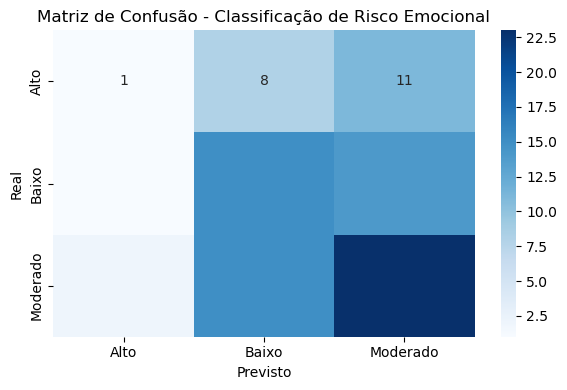

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['risco'].classes_,
            yticklabels=label_encoders['risco'].classes_)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Classificação de Risco Emocional')
plt.tight_layout()
plt.show()
